# Capítulo 6: Geomtría de las soluciones para LPs

## Qué es una solución factible...???

Satisface todas las restricciones del problema.

## Todo programa lineal se puede escribir en su forma estándar:
$$
\begin{align*}
    & \min c^Tx \\
    \text{s.r.} \\
    & A x = b \\
    & x \geq 0
\end{align*}
$$

### Qué es una solución básica...???

Si de las $n$ componentes del vector $x$, existen $m$ variables básicas y $n-m$ variables no básicas. Entonces $x$ es una solución básica del sistema.
Es decir, las $m$ columnas (correspondientes) de la matriz $A$ forman una base no singular y el cada variable no básica tiene el valor de cero.

## Qué es una variable básica...???

Es aquella variable que en la solución tiene un valor diferente de cero y su correspondiente columna forma parte de una base.


**Ejemplo: (2D)**
--
Graficar el poliedro asociado al siguiente problema lineal.
$$
\begin{align*}
    \max x + y \\
    y \geq 2 \\
    2x - y \geq 5 \\
    x+2y \leq 25 \\
    2x-4y \leq 8
\end{align*}
$$

In [1]:
import numpy as np
Vertices = []
x = np.arange(0, 20, 0.01)
y = {0:2+x*0, 
     1:2*x-5,
     2:(25-x)/2,
     3: (2*x-8)/4}
for i in range(4):
    for j in range(i+1,4):
        idx = np.argwhere(np.diff(np.sign(y[i] - y[j]))).flatten()
        if len(idx) != 0:
            x_0 = x[idx][1]
            y_0 = y[i][idx][1]
            if y_0 >=2 and 2*x_0 - y_0>= 5 and x_0+2*y_0 <= 25 and 2*x_0 - 4*y_0 <= 8:
                Vertices.append([x_0, y_0])
Vertices = np.array(Vertices)

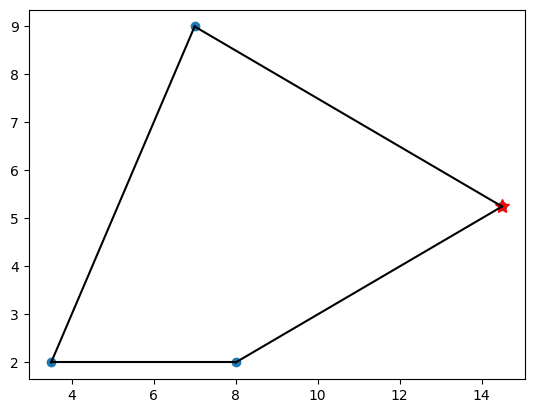

In [2]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import matplotlib.pyplot as plt

hull = ConvexHull(Vertices)

plt.plot(Vertices[:,0], Vertices[:,1], 'o')
plt.plot([29/2], [21/4], 'r',linewidth = 0,marker = '*',  markersize=10, label=r'$(x*,y*)$')

for simplex in hull.simplices:
    plt.plot(Vertices[simplex, 0], Vertices[simplex, 1], 'k-')
plt.show()

Ejercicio:
--
Encontrar el poliedro asociado al siguiente programa lineal.
$$
\begin{align*}
    &\max 8x + 6y \\
    \text{s.r.} \\
    &5x + 3y \leq 30 \\
    &2x + 3y \leq 24 \\
    &x + 3y \leq 18 \\
    &x,y \geq 0
\end{align*}
$$

Politopos convexos
--

`pip install polytope`

Para el siguiente LP:
$$
\begin{align*}
    \max x + y \\
    y \geq 2 \\
    2x - y \geq 5 \\
    x+2y \leq 25 \\
    2x-4y \leq 8
\end{align*}
$$
podemos usar el paquete `polytope` para realizar algunas operaciones sobre los politopos.

In [3]:
import numpy as np
import polytope as pc

A = np.array([ [0,-1],[-2,1],[1,2],[2,-4] ])
b = np.array([-2,-5,25,8])
politopo = pc.Polytope(A,b)
print(politopo)

`polytope` failed to import `cvxopt.glpk`.
will use `scipy.optimize.linprog`


Single polytope 
  [[ 0.      -1.     ] |    [[-2.     ]
   [-0.89443  0.44721] x <=  [-2.23607]
   [ 0.44721  0.89443] |     [11.18034]
   [ 0.44721 -0.89443]]|     [ 1.78885]]



In [4]:
# Podemos consultar si un punto se encuentra deltro del politopo
print([29/2 , 21/4] in politopo)

True


In [5]:
# Podemos verificar si un politopo contiene o esta contenido en otro

poli_2 = pc.box2poly([[0, 2], [0, 1]])
poli_3 = pc.box2poly([[0, 15], [0, 9]])

print(politopo <= poli_2)
print(politopo >= poli_2)
print(poli_2 <= poli_3)
print(poli_2 >= poli_3)
print(politopo <= poli_3)
print(politopo >= poli_3)

False
False
True
False
True
False


In [6]:
# Podemos unir o intersecar politopos
print(poli_3.union(poli_2))
print(poli_3.intersect(poli_2))


	 Polytope number 1:
	 Single polytope 
		  [[ 1.  0.] |    [[15.]
		   [ 0.  1.] x <=  [ 9.]
		   [-1. -0.] |     [ 0.]
		   [-0. -1.]]|     [ 0.]]
		
	 Polytope number 2:
	 Single polytope 
		  [[ 1.  0.] |    [[2.]
		   [ 0.  1.] x <=  [1.]
		   [-1. -0.] |     [0.]
		   [-0. -1.]]|     [0.]]
		


Single polytope 
  [[ 1.  0.] |    [[2.]
   [ 0.  1.] x <=  [1.]
   [-1. -0.] |     [0.]
   [-0. -1.]]|     [0.]]



In [7]:
# Podemos calcular la dimension
print('dimension = ', politopo.dim)

# Podemos calcular la medida de la region factible
print('Area = ',politopo.volume)
print('Area = ',poli_2.volume)

# Podemos calcular los limites sobre un cuadrado (en 2D), un cubo (en 3D), un hipercubo (n-D)
print(poli_2.bounding_box)
print(politopo.bounding_box)

dimension =  2
Area =  40.348
Area =  2.0
(array([[-0.],
       [-0.]]), array([[2.],
       [1.]]))
(array([[3.5],
       [2. ]]), array([[14.5],
       [ 9. ]]))


In [8]:
# Podemos verificar si un politopo tiene al menos una solucion factible
print(pc.is_empty(politopo))

# Podemos verificar si el politopo es convexo
print(pc.is_convex(politopo))

False
True


In [9]:
# Podemos calcular el politopo usando la envolvente convexa (la funcion requiere los vectices para el calculo)
print(pc.qhull(Vertices))

Single polytope 
  [[ 0.44721  0.89443] |    [[11.18034]
   [-0.89443  0.44721] x <=  [-2.23607]
   [ 0.44721 -0.89443] |     [ 1.78885]
   [-0.      -1.     ]]|     [-2.     ]]



In [10]:
# Podemos calcular los Vertices de un politopo
print(pc.extreme(politopo))

[[ 8.    2.  ]
 [14.5   5.25]
 [ 7.    9.  ]
 [ 3.5   2.  ]]


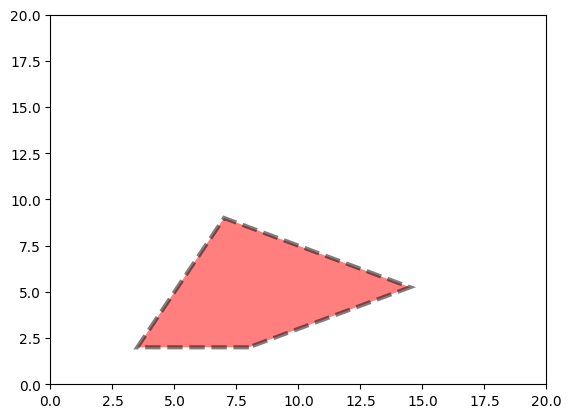

In [11]:
# podemos graficar el politopo generado

politopo.plot(color='r',alpha=0.5) # linestyle='-',linewidth = 1.5
#plt.plot(Vertices[:,0], Vertices[:,1], 'o')
#plt.plot([29/2], [21/4], 'r',linewidth = 0,marker = '*',  markersize=10, label=r'$(x*,y*)$')
plt.xlim(0,20)
plt.ylim(0,20)
plt.show()

Ejercicio:
--

Que pasa si la región es no acotada..._????

Por ejemplo, el siguiente LP tiene una región factible no acotada.

$$
\begin{align*}
    \min x + y \\
    x + 2y \geq 5\\
    4x + y \geq 6
\end{align*}
$$

cómo podemos graficar la región factible... ??? 

**Ejemplo: (3D)**
--
Graficar el poliedro asociado al siguiente problema lineal.
$$
\begin{align*}
    &\max x + y + z \\
    \text{s.r.} \\
    &x \leq 1 \\
    &y \leq 1 \\
    &z \leq 1 \\
    & x,y,z \geq 0
\end{align*}
$$

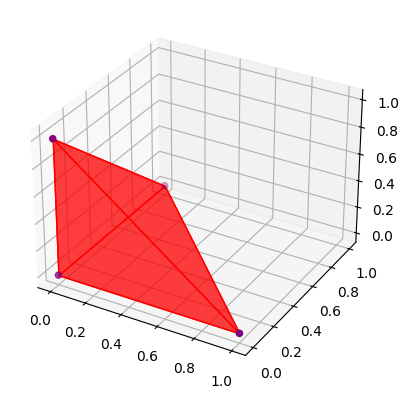

In [12]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull

Vertices = np.array([[1,0,0],[0,1,0],[0,0,1], [0,0,0] ])
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
hull = ConvexHull(Vertices)
# draw the polygons of the convex hull
for s in hull.simplices:
       tri = Poly3DCollection([Vertices[s]])
       tri.set_color('r')
       tri.set_alpha(0.5)
       ax.add_collection3d(tri)
# draw the vertices
ax.scatter(Vertices[:, 0], Vertices[:, 1], Vertices[:, 2], marker='o', color='purple')
plt.show()

Ejercicio:
--
Encontrar el poliedro asociado al siguiente programa lineal.
$$
\begin{align*}
    &\max 8x + 6y + 3z \\
    \text{s.r.} \\
    &5x + 3y \leq 30 \\
    &2x + 3y + z \leq 24 \\
    &x + 3y - 2z \leq 18 \\
    &x,y,z \geq 0
\end{align*}
$$

Deber:
--
Encontrar el poliedro asociado a los siguientes programas lineales.
$$
\left\{
\begin{align*}
    &\max 550x + 600 y \\
    \text{s.r.} \\
    &12 x + 20 y \leq 288 \\
    &10 x + 8y \leq 192 \\
    &20x + 20 y \leq 384 \\
    &x,y \geq 0
\end{align*} \right.

\qquad \qquad
\left\{
\begin{align*}
    &\max 550x + 600 y + 100 z \\
    \text{s.r.} \\
    &12 x + 20 y + 20 z \leq 288 \\
    &10 x + 8y  + 20 z \leq 192 \\
    &20x + 20 y  + 20 z \leq 384 \\
    &x,y \geq 0
\end{align*}\right.
$$